<a href="https://colab.research.google.com/github/soledadmon/Data-Science-I/blob/main/Entrega_1/ProyectoDSParteI_Montero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Primer entrega**
----  
**Abstract**

Para este proyecto se utilizo un dataset tomado de la realidad pero con datos modificados para no exponer información.
El estudio es sobre una empresa de transporte que tiene vehículos que trasladan personas, estos vehículos tienen viajes asignados. Pero a veces paralizan por distintos motivos, por ejemplo el vehículo se rompio y necesita ir al taller o el personal se durmio y llego tarde para realizar los viajes.

Estas paralizaciones pueden estar justificadas o no. Por ejemplo si el coche se rompe es una paralización justificada pero si es el personal es el que se duerme, la paralización no esta justificada.

Por lo que deseo realizar un estudio de cuanto es el tiempo que se pierde, cuantos viajes se dejan sin realizar, cual es el mayor motivo por el cual se estan realizando las paralizaciones.

El objetivo es poder identificar problemas para buscarles la mejor solución y bajar los tiempos de paralizaciones a futuro.
Luego para la tarea final me gustaría tener un dataset con el total de horas asignadas por coche para evaluar sobre el total e incorporar un dataset con los coches que son a gasoil de los coches que son electricos para hacer un estudio teniendo en cuenta el cambio de la matriz energetica.

En el datasent que estoy utilizando para ésta entrega se muetran las paralizaciones de los últimos 3 meses (junio, julio, agosto), y la informacion que brinda es: el coche que paralizo, desde que hora hasta que hora paralizo, el motivo por el cual paralizo, si concurrio a algún taller a que taller concurrio, si esta justificada la paralización, el perriodo (mes_anio al que pertenece la paralización) y a que grupo de paralizaciones pertencese.

Para realizar un correcto análisis de la información brindada por el dataset se realizará con una limpieza básica y una detección de valores faltantes, seguida de visualizaciones que permiten responder las preguntas principales para poder sacar concluciones. Para ello se aplican técnicas de análisis univariado, bivariado y multivariado, utilizando herramientas como Matplotlib, Seaborn y pandas.

----  

**Preguntas e hipótesis de interés**

Las preguntas en esta primer instancia serían:
- ¿Cuántas horas se pierden por mes?
- ¿Cuál es el motivo por el que se pierden horas?
- ¿Cuáles es el coche que pierde mas horas por mes?
- ¿De esas paralizaciones cual es el porcentaje que esta justificado?

---
**Visualizaciones (univariadas, bivariadas o multivariadas) y análisis**





In [2]:
# Importaciones

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Cargar dataset

uri_ruta = "https://raw.githubusercontent.com/soledadmon/Data-Science-I/refs/heads/main/Entrega_1/ParalizacionesA.csv"
pnes_df = pd.read_csv(uri_ruta)
pnes_df.sample(10)

,coche,fecha_hora_desde,fecha_hora_hasta,cod_causal,desc_causal,es_justificada,periodo,cod_taller,desc_taller,grupo
8622,3644,2025-08-07 18:48,2025-08-07 20:41,3,Electricidad,t,202508,NaN,NaN,2
390,3644,2025-06-03 8:35,2025-06-03 11:20,16,Pasajero/a,t,202506,NaN,NaN,3
6493,7702,2025-07-23 7:12,2025-07-23 8:42,4,Carrocería,t,202507,NaN,NaN,2
4649,4675,2025-07-07 21:17,2025-07-08 0:27,4,Carrocería,t,202507,NaN,NaN,2
9620,9245,2025-08-15 22:22,2025-08-15 23:44,5,Remolque,t,202508,NaN,NaN,2
5275,11035,2025-07-11 8:56,2025-07-11 10:40,5,Remolque,t,202507,NaN,NaN,2
402,3347,2025-06-04 8:03,2025-06-04 10:52,3,Electricidad,t,202506,NaN,NaN,2
3061,6878,2025-06-24 22:30,2025-06-25 1:10,5,Remolque,t,202506,NaN,NaN,2
2993,5110,2025-06-23 13:52,2025-06-23 20:53,9,Conductor Indispuesto o Dormido,f,202506,NaN,NaN,1
6904,4634,2025-07-27 11:11,2025-07-27 11:30,1,Mecánica,t,202507,NaN,NaN,2


In [4]:
# Adaptar mejor la informacón para los gráficos

pnes_df['fecha_desde'] = pd.to_datetime(pnes_df['fecha_hora_desde']).dt.date
pnes_df['fecha_hasta'] = pd.to_datetime(pnes_df['fecha_hora_hasta']).dt.date
pnes_df.head()

,coche,fecha_hora_desde,fecha_hora_hasta,cod_causal,desc_causal,es_justificada,periodo,cod_taller,desc_taller,grupo,fecha_desde,fecha_hasta
0,8429,2025-06-01 4:03,2025-06-01 4:13,3,Electricidad,t,202506,NaN,NaN,2,2025-06-01,2025-06-01
1,11267,2025-06-01 7:00,2025-06-01 8:00,2,Gomería,t,202506,NaN,NaN,2,2025-06-01,2025-06-01
2,10573,2025-06-01 18:12,2025-06-02 1:10,9,Conductor Indispuesto o Dormido,f,202506,NaN,NaN,1,2025-06-01,2025-06-02
3,10821,2025-06-01 22:10,2025-06-02 0:37,9,Conductor Indispuesto o Dormido,f,202506,NaN,NaN,1,2025-06-01,2025-06-02
4,8354,2025-06-01 22:15,2025-06-01 23:35,26,Tecnología móvil o atención telefónica,t,202506,NaN,NaN,6,2025-06-01,2025-06-01


In [5]:
#Encontrar valores perdidos

missing = pnes_df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0
desc_taller,11192
cod_taller,11188


Se observa que hay valores faltantes en los datos del taller, lo cual es correcto porque no todas las paralizaciones son por roturas que ameriten ir al taller, por lo que esta información se va a catalogar como causal 0 y descripción "Sin taller" de manera de no tener campos en nulo sino campos que me otorguen la información de que esas paralizaciones son sin taller

In [6]:
#Importo la librería del imputador
from sklearn.impute import SimpleImputer

#me hago una copia de mi df
pnes_df_imp = pnes_df.copy()

# Creo el imputador que reemplaza los valores constantes
imputadorCodTaller = SimpleImputer(strategy='constant', fill_value=0)
imputadorDescTaller = SimpleImputer(strategy='constant', fill_value="Sin taller")

# Aplicar el imputador solo a la columna deseada
pnes_df_imp[['cod_taller']] = imputadorCodTaller.fit_transform(pnes_df[['cod_taller']]).astype(int)
pnes_df_imp[['desc_taller']] = imputadorDescTaller.fit_transform(pnes_df[['desc_taller']])


pnes_df = pnes_df_imp.copy()
# Mostrar el resultado
pnes_df.head()





,coche,fecha_hora_desde,fecha_hora_hasta,cod_causal,desc_causal,es_justificada,periodo,cod_taller,desc_taller,grupo,fecha_desde,fecha_hasta
0,8429,2025-06-01 4:03,2025-06-01 4:13,3,Electricidad,t,202506,0,Sin taller,2,2025-06-01,2025-06-01
1,11267,2025-06-01 7:00,2025-06-01 8:00,2,Gomería,t,202506,0,Sin taller,2,2025-06-01,2025-06-01
2,10573,2025-06-01 18:12,2025-06-02 1:10,9,Conductor Indispuesto o Dormido,f,202506,0,Sin taller,1,2025-06-01,2025-06-02
3,10821,2025-06-01 22:10,2025-06-02 0:37,9,Conductor Indispuesto o Dormido,f,202506,0,Sin taller,1,2025-06-01,2025-06-02
4,8354,2025-06-01 22:15,2025-06-01 23:35,26,Tecnología móvil o atención telefónica,t,202506,0,Sin taller,6,2025-06-01,2025-06-01


In [7]:
# Verifico como quedo el data set

missing = pnes_df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


**Grafícos**

In [8]:

# Primero calculo la cantidad de paralizaciones por mes
cant_pnes_por_mes = pnes_df.groupby('periodo').size().reset_index(name='cantidad')
print(cant_pnes_por_mes)

   periodo  cantidad
0   202506      3840
1   202507      3988
2   202508      3603


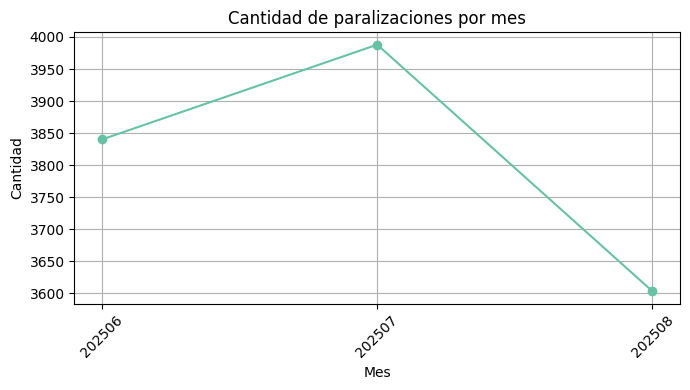

In [9]:
colores = sns.color_palette("Set2")

plt.figure(figsize=(7,4))
labels = cant_pnes_por_mes['periodo'].astype(str)
x = range(len(labels)) # Crear índice numérico para X

plt.plot(
    x,
    cant_pnes_por_mes['cantidad'],
    marker='o',
    color=colores[0]
)

plt.title('Cantidad de paralizaciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.grid(True)

# Asignar manualmente las etiquetas X
plt.xticks(ticks=x, labels=labels, rotation=45)

plt.tight_layout()
plt.show()



Del trimestre del cual se aporte información el mes de julio fue el de más paralizaciones

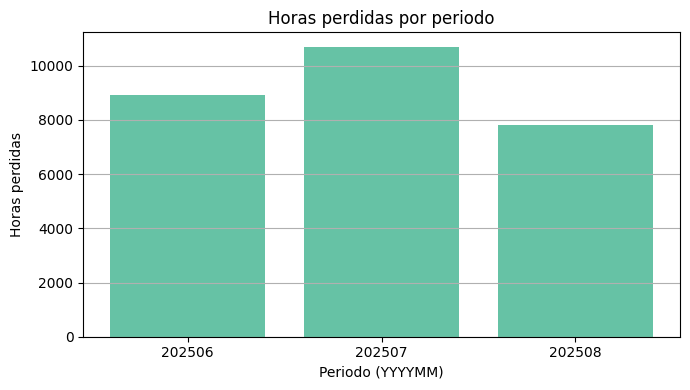

In [10]:
#cantidad de horas perdidas por período

# convierto la valores a date time
pnes_df['fecha_hora_desde'] = pd.to_datetime(pnes_df['fecha_hora_desde'])
pnes_df['fecha_hora_hasta'] = pd.to_datetime(pnes_df['fecha_hora_hasta'])

# Calcular la duración en horas y llevarlo a formato horas
pnes_df['horas_perdidas'] = (pnes_df['fecha_hora_hasta'] - pnes_df['fecha_hora_desde']).dt.total_seconds() / 3600

# Agrupar por periodo y sumar las horas perdidas
horas_por_periodo = pnes_df.groupby('periodo')['horas_perdidas'].sum().reset_index()


#Grafico
plt.figure(figsize=(7, 4))
plt.bar(horas_por_periodo['periodo'].astype(str), horas_por_periodo['horas_perdidas'], color=colores[0]) # creo el gráfico de barras eje x e y en ese orden, .astype(str) para ver la etiqueta como un string
plt.title('Horas perdidas por periodo')
plt.xlabel('Periodo (YYYYMM)')
plt.ylabel('Horas perdidas')
plt.grid(True, axis='y') # Pongo de la cuadrícula solo las barras horizontales
plt.tight_layout() #ajusto márgenes
plt.show()


La mayor cantidad de horas perdidas también se da en julio

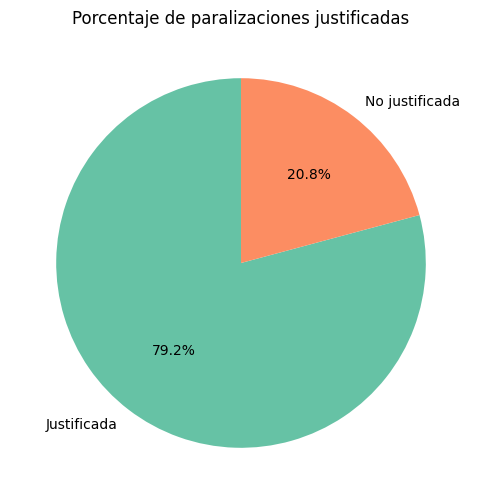

In [11]:

import matplotlib.colors as mcolors

# Crear columna nueva con etiquetas más claras
pnes_df["justificado_desc"] = pnes_df["es_justificada"].map({"t": "Justificada", "f": "No justificada"})

# Calcular porcentaje de cada categoría
justificados = pnes_df["justificado_desc"].value_counts(normalize=True) * 100

# Gráfico de torta
hex_color_1 = mcolors.to_hex(colores[0])
hex_color_2 = mcolors.to_hex(colores[1])

plt.figure(figsize=(6,6))
plt.pie(
    justificados,
    labels=justificados.index,
    autopct="%.1f%%",
    colors=[hex_color_1, hex_color_2],
    startangle=90
)
plt.title("Porcentaje de paralizaciones justificadas")
plt.show()

La mayor cantidad de pannes son justificadas

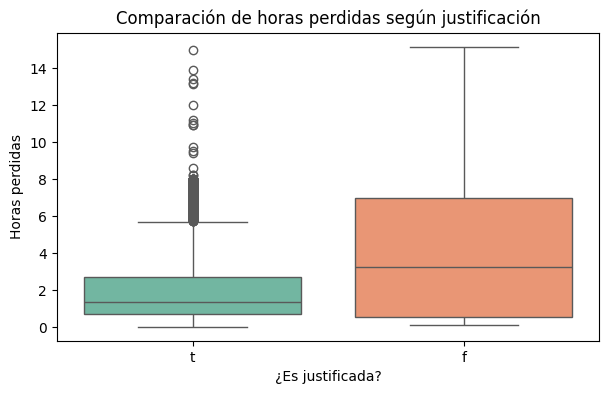

In [12]:
#Horas perdidas y justificacion
plt.figure(figsize=(7,4))
sns.boxplot(
    data=pnes_df,
    x="es_justificada",
    y="horas_perdidas",
    hue="es_justificada",
    palette="Set2",
    legend=False
)
plt.title("Comparación de horas perdidas según justificación")
plt.xlabel("¿Es justificada?")
plt.ylabel("Horas perdidas")
plt.show()



Las paralizaciones injustificadas suelen durar más y las paralizaciones justificadas suelen ser más cortas y consistentes, pero con algunos casos extremos muy largos. Por lo que las paralizaciones no justificadas tienden a generar más horas perdidas en promedio.

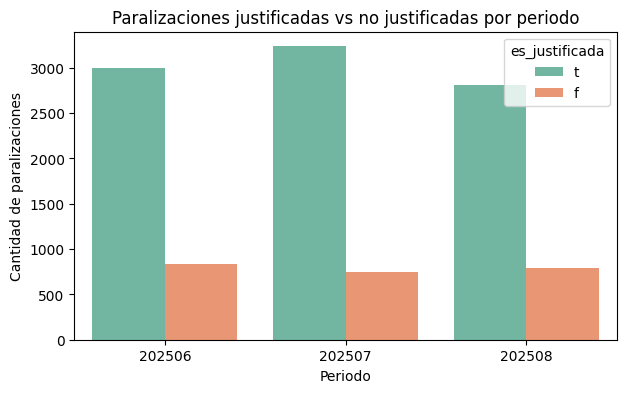

In [13]:
#Detalle de paralizaciones justificadas y no justificadas por periodo
import matplotlib.pyplot as plt
import seaborn as sns


top_periodos = pnes_df['periodo'].value_counts().head(6).index
df_top = pnes_df[pnes_df['periodo'].isin(top_periodos)]

plt.figure(figsize=(7,4))
sns.countplot(data=df_top, x='periodo', hue='es_justificada', palette="Set2")
plt.title('Paralizaciones justificadas vs no justificadas por periodo')
plt.xlabel('Periodo')
plt.ylabel('Cantidad de paralizaciones')
plt.show()

Todos los meses las pannes injustificadas son significativamente menores a las justificadas

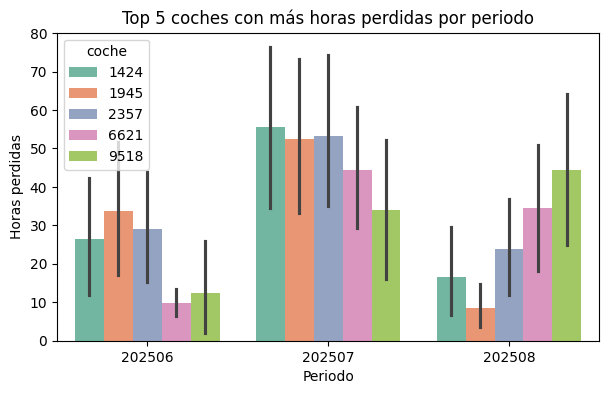

In [14]:

#top 5 de los coches que mas horas pierden por mes
top_coches = pnes_df.groupby("coche")["horas_perdidas"].sum().nlargest(5).index
df_top = pnes_df[pnes_df["coche"].isin(top_coches)]

plt.figure(figsize=(7,4))
sns.barplot(data=df_top, x="periodo", y="horas_perdidas", hue="coche", estimator=sum,  palette="Set2")
plt.title("Top 5 coches con más horas perdidas por periodo")
plt.ylabel("Horas perdidas")
plt.xlabel("Periodo")
plt.show()

Los coches con mas paralizaciones son: 1424,1945,2357,6621,9518

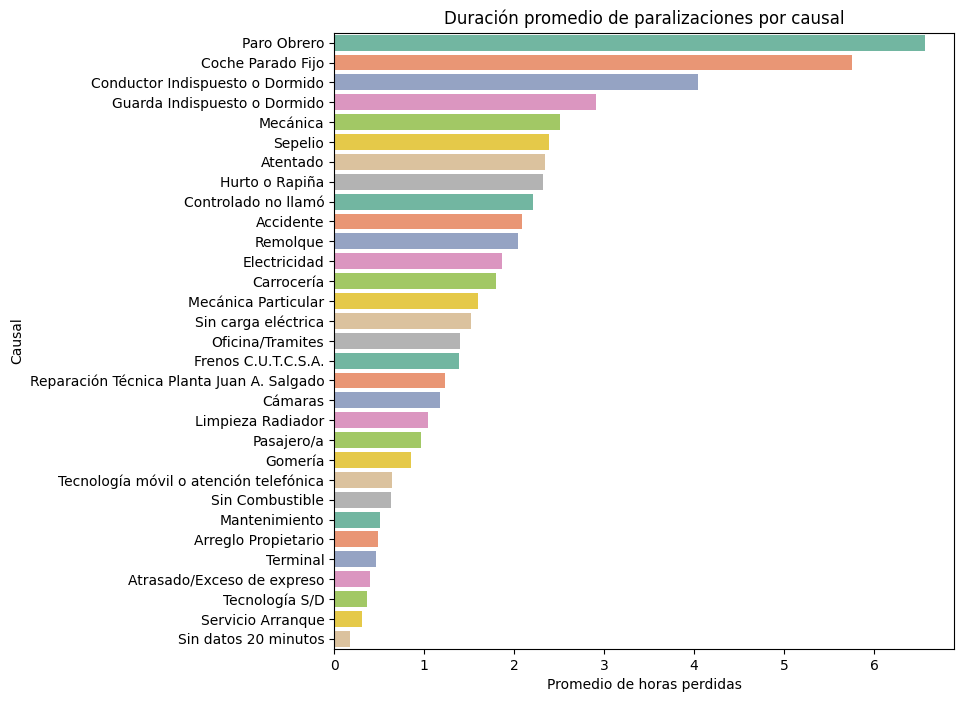

In [16]:
#Duracion promedio (promedio de horas de paralizción) de paralizaciones por causal
causal_duracion = (
    pnes_df.groupby("desc_causal")["horas_perdidas"]
    .mean()
    .reset_index()
    .sort_values("horas_perdidas", ascending=False)
)

plt.figure(figsize=(8,8))
sns.barplot(
    data=causal_duracion,
    x="horas_perdidas",
    y="desc_causal",
    hue="desc_causal",          # usa la causal como hue
    palette="Set2",
    legend=False
)

plt.title("Duración promedio de paralizaciones por causal")
plt.xlabel("Promedio de horas perdidas")
plt.ylabel("Causal")
plt.show()


Los causales con más paralizaciones son:Paro obrero, Coche parado fijo, conductor indispuesto o dormido

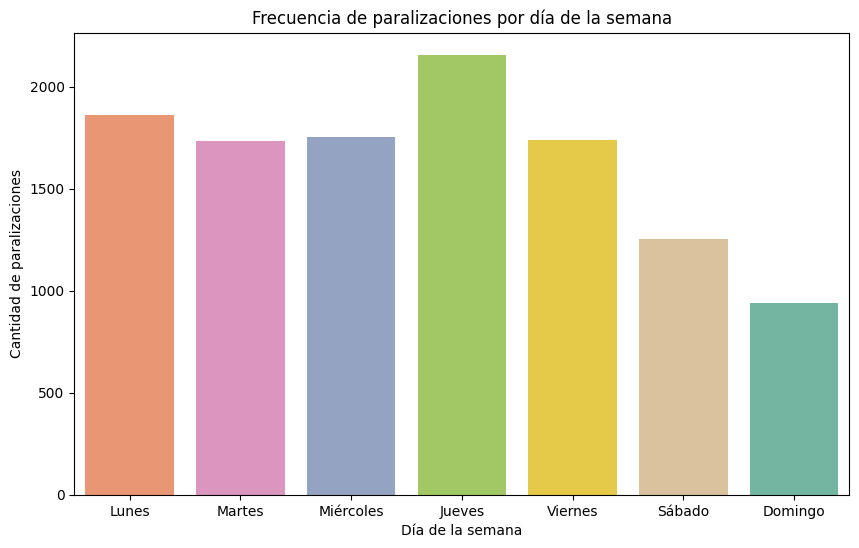

In [17]:

#Frecuencia de paralizaciones
pnes_df["dia_semana_or"] = pd.to_datetime(pnes_df["fecha_desde"]).dt.day_name()
# Diccionario para traducir
traducir = {
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miércoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}

pnes_df["dia_semana"] = pnes_df["dia_semana_or"].map(traducir)

plt.figure(figsize=(10,6))
sns.countplot(
    data=pnes_df,
    x="dia_semana",
    order=["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"],
    hue="dia_semana",  # separo por categoría
    palette="Set2",    #saco la etiquea para usar la categoría
    legend=False
)

plt.title("Frecuencia de paralizaciones por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de paralizaciones")
plt.show()




Los días que más paralizaciones hay son los jueves

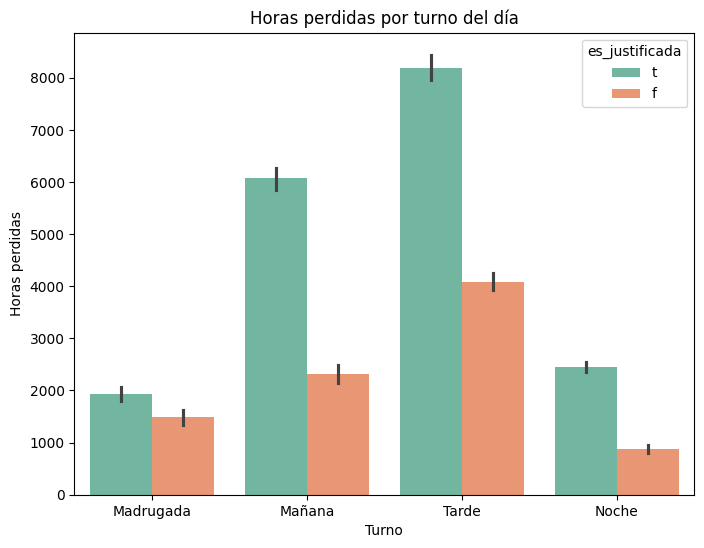

In [18]:
#horas perdidas por turno
pnes_df["hora"] = pd.to_datetime(pnes_df["fecha_hora_desde"]).dt.hour
pnes_df["turno"] = pd.cut(
    pnes_df["hora"],
    bins=[0, 6, 12, 18, 24],
    labels=["Madrugada", "Mañana", "Tarde", "Noche"],
    right=False
)

plt.figure(figsize=(8,6))
sns.barplot(
    data=pnes_df,
    x="turno",
    y="horas_perdidas",
    hue="es_justificada",
    estimator=sum,
    palette="Set2"
)
plt.title("Horas perdidas por turno del día")
plt.xlabel("Turno")
plt.ylabel("Horas perdidas")
plt.show()

El horario en que más se paraliza es de 12:00 a 18:00 hs

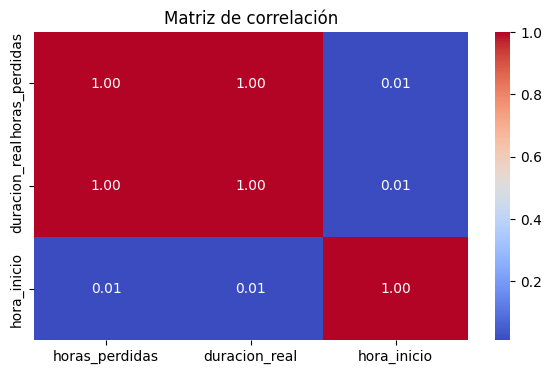

In [19]:
#Matriz de correlacion de horas perdidas
pnes_df["inicio_dt"] = pd.to_datetime(pnes_df["fecha_hora_desde"], errors="coerce")
pnes_df["fin_dt"] = pd.to_datetime(pnes_df["fecha_hora_hasta"], errors="coerce")
pnes_df["duracion_real"] = (pnes_df["fin_dt"] - pnes_df["inicio_dt"]).dt.total_seconds() / 3600
pnes_df["hora_inicio"] = pnes_df["fecha_hora_desde"].dt.hour

# Seleccionar variables numéricas
num_df = pnes_df[["horas_perdidas", "duracion_real", "hora_inicio"]]

# Matriz de correlación
corr = num_df.corr()

plt.figure(figsize=(7,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

La matriz del último gráfico refleja que solo horas_perdidas y duracion_real están fuertemente relacionadas (prácticamente idénticas).

Todo lo demás tiene correlación muy baja (0.1), lo que indica poca relación lineal entre variables numéricas.

**Conclución**

De los datos del trimestre bindados puedo extraer la siguiente información:

- Los dos primeros gáficos muestran que el peor mes fue julio con la mayor cantidad de paralizaciones y coincide (logicamente) con la mayor cantidad de horas perdidas para dicho mes.

- La mayor cantidad de paralizaciones son justificadas y los causales con mayor porsentaje de paralizaciones son: Paro obrero, Coche parado fijo, conductor indispuesto o dormido.

- El día que más se paraliza es el jueves y el horario en que más se paraliza es de 12:00 a 18:00 hs


- Los coches con más paralizaciones son: 1424,1945,2357,6621,9518

Al dataset le agreegaría mas meses de información para poder sacar mejores conclusiones, ademas me gustaría una columna con el tiempo de cada paralizacion y lo completaría con más información para sacar mejores concluciones. Aunque ya son suficientes como para saber que si deseo disminuir la cantida de paralizaciones y bajar el tiempo que se pierde por las paralizaciones el problema no lo tengo en la falla de los coches y tiempos del taller (que sepueden mejorar), sino en la falta de personal, y pudo estimar en que momentos neceisto más personal para cubrir el faltante.
